In [41]:
# Importation bibliothèques et modules Python
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split


bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

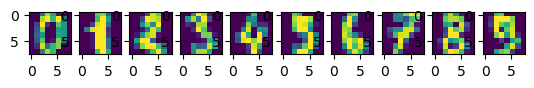

In [42]:
# Importation du dataset digits de scikit-learn
from sklearn.datasets import load_digits

# Sauvegarde du dataset digits de scikit-learn dans la variable digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [43]:
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [44]:
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Chargement du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()

# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.6606922126081582


In [45]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8888888888888888
0.8111111111111111
0.8111111111111111
0.8333333333333334
0.8888888888888888
0.8666666666666667
0.8222222222222222
0.8555555555555555
0.8777777777777778
0.8444444444444444
0.7666666666666667
0.8666666666666667
0.8777777777777778
0.9
0.8777777777777778
0.8
0.8555555555555555
0.8444444444444444
0.8444444444444444
0.8777777777777778
0.9
0.8777777777777778
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.7888888888888889
0.8555555555555555
0.9444444444444444
0.8777777777777778
0.8222222222222222
0.8111111111111111
0.8444444444444444
0.9555555555555556
0.8555555555555555
0.8555555555555555
0.9
0.8444444444444444
0.8888888888888888
0.8777777777777778
0.8888888888888888
0.8
0.8555555555555555
0.8666666666666667
0.8222222222222222
0.8333333333333334
0.9111111111111111
0.8888888888888888
0.9
0.8666666666666667
0.8444444444444444
0.8555555555555555
0.8555555555555555
0.8333333333333334
0.8777777777777778
0.8555555555555555
0.8222222222222222
0.8444444444444444
0.92222

In [46]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [47]:
# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.9777777777777777


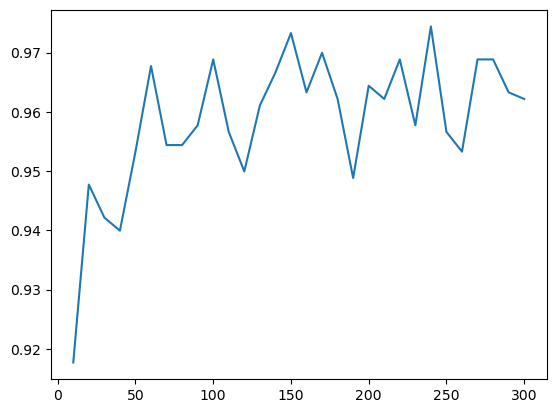

In [48]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Application du modèle bagging classifier
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    
    # Application du modèle aux données d'entrainement
    clf.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [49]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9254727474972191
max_samples: 0.8
max_features: 0.6


In [50]:
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Chargement du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)

# Application du modèle
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [52]:
# prédiction des résultats du modèle random forest classifier
y_pred = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))


Accuracy = 0.9184177997527813


In [53]:
# Chargement et application du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle bagging classifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.7218788627935723
Bagging (200 arbres) : 0.896168108776267
Forêt aléatoire (200 arbres) : 0.9208899876390606


In [54]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9328142380422694 0.008400982241823904
0.956952169076752 0.0067853170189098875


10 0.9399332591768632
20 0.9566184649610678
30 0.9766407119021134
40 0.9777530589543938
50 0.9710789766407119
60 0.978865406006674
70 0.9799777530589544
80 0.9755283648498332
90 0.982202447163515
100 0.978865406006674
110 0.9777530589543938
120 0.9799777530589544
130 0.9744160177975528
140 0.9766407119021134
150 0.9810901001112347
160 0.982202447163515
170 0.9810901001112347
180 0.9833147942157954
190 0.9810901001112347
200 0.9799777530589544
210 0.982202447163515
220 0.9844271412680756
230 0.9799777530589544
240 0.9810901001112347
250 0.9799777530589544
260 0.9810901001112347
270 0.982202447163515
280 0.9844271412680756
290 0.978865406006674
300 0.9810901001112347


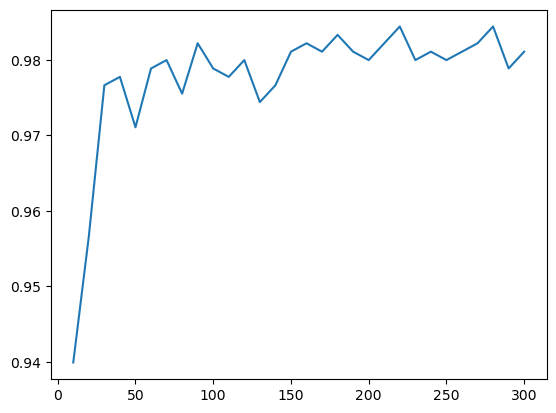

In [55]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.96440489432703
Extra Trees : 0.9777530589543938


In [57]:
from sklearn.ensemble import AdaBoostClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8726823238566132
